# Introduction to Neural Networks

**Hello everyone!** 

Imagine you have lots of little helpers (called "neurons") who pass simple messages (numbers) to each other. Together, they can learn to solve problems—just like a team figuring out puzzles. This is what a **Neural Network** does!

In this notebook, we will explore:
1. What neurons are.
2. How they connect into layers.
3. How they learn through something called **gradient descent** and **backpropagation**.
4. How to build a simple neural network in Python to recognise flower types (using the Iris dataset as an example).

We will keep things as simple as possible.

### Neurons: The Little Helpers

**Think of a neuron like a small box** that waits for numbers (information) to come in. 
It does a tiny calculation (like adding or multiplying) and then passes the result along to another neuron.

- Each neuron has weights (like small switches) and a bias (a little push).
- When numbers come in, they get multiplied by weights, added together, and then the bias is added. 
- The result might get squashed with a function (called the activation function), then sent to the next neuron.

This is how one neuron works. A neural network has many such neurons, arranged in **layers**.

### Layers: Stacks of Neurons

**A layer is a group of neurons** side-by-side, each doing its tiny calculation. 
- The first layer receives the original input (like a picture or some numbers about flowers).
- The middle layers are called **hidden layers** (because we usually don't see what they do directly).
- The final layer makes a **prediction**—like, "This flower is setosa," or "This flower is versicolor," etc.

Sometimes, many layers in a network are called **deep** learning (because it's deep with lots of layers).


# Gradient Descent and Backpropagation: How Neurons Learn

**Gradient Descent**:
- Imagine you are on a hill in the fog and want to get to the bottom (the best solution).
- You can't see far, so you take small steps downhill (the direction where the ground slopes down the most).
- Eventually, step by step, you get to the lowest point you can find.

**Backpropagation**:
- It's like checking how each little step affects the total error (like how far you are from the goal at the bottom).
- If a neuron didn't do its job well, we adjust its weights and bias.
- We do this backwards, layer by layer, so each neuron learns how to do better next time.

This is repeated many times until the network is good at guessing or predicting.

In [5]:
# We will use a small flower dataset (the famous Iris dataset).
# It has measurements of petals and sepals, and the type of flower (3 species).

# numpy helps with math on big lists of numbers.
import numpy as np #

# pandas is for reading and handling data tables.
import pandas as pd #

# matplotlib and seaborn help us draw pictures of our data.
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow/Keras will build and train our neural network.
# For our neural network, we'll use TensorFlow / Keras (a simple library for neural networks).
from tensorflow import keras
from tensorflow.keras import layers

print("Libraries imported successfully!")

Libraries imported successfully!


In [6]:
# Don't worry about this piece of code, it is to make sure that the dataset is installed correctly
# If you get an error in the following cell, run this cell, restart the kernel and then run the following cell again
import certifi
import os

os.environ["SSL_CERT_FILE"] = certifi.where()

In [7]:
# Load Iris data directly from seaborn for simplicity
iris_data = sns.load_dataset("iris")

# The Iris dataset has 150 flowers with columns: sepal_length, sepal_width, petal_length, petal_width, and species.
# The species can be one of three types: setosa, versicolor, or virginica.

# Let's see the first few rows
print(iris_data.head())

# Check how many rows and columns
print("\nDataset shape:", iris_data.shape)

# Check what species we have
print("\nSpecies distribution:")
print(iris_data["species"].value_counts())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset shape: (150, 5)

Species distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [8]:
# We need to separate the "input" (measurements) from the "output" (species).
X = iris_data.drop("species", axis=1)  # All columns except 'species'
y = iris_data["species"]  # Just the 'species' column

# For the output (y), we need to turn the species names into numbers.
# Keras can handle this with "one-hot encoding", but let's do it manually with pandas "get_dummies".
y_encoded = pd.get_dummies(y)

# Now, X contains the measurements (4 columns).
# y_encoded contains something like:
#   setosa  versicolor  virginica
# 0    1        0         0
# 1    1        0         0
# ... and so on
print("Encoded species (first few rows):")
print(y_encoded.head())

"""
Neural networks want numbers. So we convert the species into columns of 0/1 (one-hot encoding).

For example, if a flower is setosa, it might be represented as [1, 0, 0].
"""

Encoded species (first few rows):
   setosa  versicolor  virginica
0    True       False      False
1    True       False      False
2    True       False      False
3    True       False      False
4    True       False      False


'\nNeural networks want numbers. So we convert the species into columns of 0/1 (one-hot encoding).\n\nFor example, if a flower is setosa, it might be represented as [1, 0, 0].\n'

In [9]:
from sklearn.model_selection import train_test_split

# Split our data into training set (to learn) and test set (to check if it learned well).
# We'll use 80% for training, 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (120, 4)
Test set size: (30, 4)


In [10]:
# We'll make a small network:
# Input layer -> Hidden layer -> Output layer.

model = keras.Sequential(
    [
        layers.Dense(
            8, activation="relu", input_shape=(4,)
        ),  # 4 inputs (4 measurements), 8 neurons
        layers.Dense(8, activation="relu"),  # Another hidden layer with 8 neurons
        layers.Dense(
            3, activation="softmax"
        ),  # 3 outputs (setosa, versicolor, virginica)
    ]
)

# Compile the model:
# - loss='categorical_crossentropy' because we have more than two categories
# - optimizer='adam' is a popular version of gradient descent
# - metrics=['accuracy'] to track how many we get right
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print("Neural network created and compiled!")
model.summary()  # Let's see what our model looks like

Neural network created and compiled!


/Users/scsoc/Library/Python/3.12/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Let's train for some epochs (think of 1 epoch as seeing all training data once).
# We'll keep it small, e.g., 50 epochs, so it runs quickly.

history = model.fit(
    X_train,  # our inputs for training
    y_train,  # our one-hot encoded output labels
    epochs=50,  # how many times to see all data
    batch_size=8,  # how many samples to process before updating weights
    validation_split=0.2,  # split part of the training set for validation
    verbose=0,  # set to 1 if you want to see the progress bar
)

# Let's look at final accuracy on the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", test_acc)

Test accuracy: 0.9333333373069763


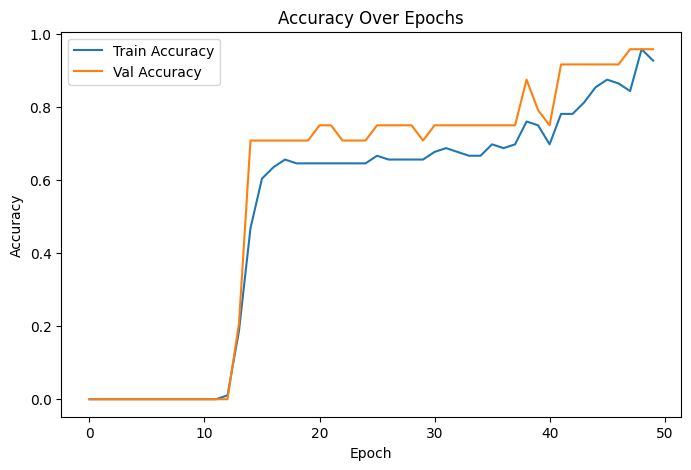

In [12]:
# Let's plot the training and validation accuracy over epochs.
plt.figure(figsize=(8, 5))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Recap and Next Steps

**Great job!** We've built a small neural network to classify flowers in the Iris dataset. 
We learned:
- How neurons are like little helpers that perform small calculations.
- How layers stack these neurons.
- How networks learn by taking small steps down the "hill" (gradient descent).
- How "backpropagation" helps each neuron fix its mistakes.

**What next?**
- Try adding more layers to see if accuracy changes.
- Try changing the activation function to see what happens.
- Use a different dataset (e.g., digits or something else).

### Simple (Child-Like) Summary

1. **Neuron**: A tiny friend who reads numbers, does a small sum, and sends out a number.
2. **Layer**: A bunch of friends (neurons) side by side.
3. **Network**: Lots of layers stacked to solve a problem together.
4. **Gradient Descent**: Tiny steps to find the best path (like going downhill).
5. **Backpropagation**: Checking who made mistakes and fixing them from the end back to the start.

This is how a neural network learns!

### Using Generative AI for Neural Network Experiments

If you get stuck or want to **try different approaches**, you can use prompt engineering with a tool like ChatGPT. 

Example prompt:
"Please show me how to build a deeper neural network in Keras for the Iris dataset, with 3 hidden layers. Use 'relu' activation and show me how to evaluate with accuracy and confusion matrix. Provide code in a Jupyter Notebook format."

By giving **specific instructions**, you often get detailed code you can copy, run, and learn from. Happy experimenting!